In [1]:
import torch
from dataset import IrisDataset
from torch.utils.data import DataLoader 
import numpy as np
import matplotlib.pyplot as plt
from dataset import transform
import os
from opt import parse_args
from models import model_dict
from tqdm import tqdm
from utils import get_predictions
import matplotlib.pyplot as plt

In [2]:
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
if torch.cuda.is_available():
    device=torch.device("cuda")
else:
    device=torch.device("cpu")

In [4]:
model = model_dict['densenet']
model  = model.to(device)
filename = 'best_model.pkl'

In [5]:
if not os.path.exists(filename):
    print("model path not found !!!")
else:
    print('model load ok!')

model load ok!


In [6]:
model.load_state_dict(torch.load(filename))
model = model.to(device)
model.eval()

DenseNet2D(
  (down_block1): DenseNet2D_down_block(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv21): Conv2d(33, 32, kernel_size=(1, 1), stride=(1, 1))
    (conv22): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv31): Conv2d(65, 32, kernel_size=(1, 1), stride=(1, 1))
    (conv32): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (max_pool): AvgPool2d(kernel_size=None, stride=None, padding=0)
    (relu): LeakyReLU(negative_slope=0.01)
    (dropout1): Dropout(p=0.2, inplace=False)
    (dropout2): Dropout(p=0.2, inplace=False)
    (dropout3): Dropout(p=0.2, inplace=False)
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (down_block2): DenseNet2D_down_block(
    (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv21): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
    (conv22): Conv2d(32, 32, kernel_size=(3, 3), stride=

In [7]:
test_set = IrisDataset(filepath = 'Semantic_Segmentation_Dataset/',\
                                 split = 'test',transform = transform)
    
testloader = DataLoader(test_set, batch_size = 4,
                             shuffle=False, num_workers=2)

In [8]:
counter=0
    
os.makedirs('test/labels/',exist_ok=True)
os.makedirs('test/output/',exist_ok=True)
os.makedirs('test/mask/',exist_ok=True)

In [11]:
data.shape

torch.Size([3, 1, 640, 400])

100%|█████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.46it/s]


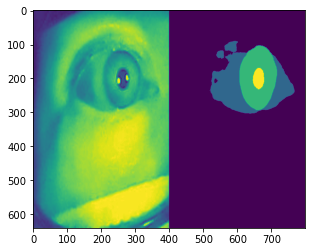

In [9]:
with torch.no_grad():
    for i, batchdata in tqdm(enumerate(testloader),total=len(testloader)):
        img,labels,index,x,y= batchdata
        data = img.to(device)       
        output = model(data)            
        predict = get_predictions(output)
        for j in range (len(index)):       
            np.save('test/labels/{}.npy'.format(index[j]),predict[j].cpu().numpy())
            try:
                plt.imsave('test/output/{}.jpg'.format(index[j]),255*labels[j].cpu().numpy())
            except:
                pass
                
            pred_img = predict[j].cpu().numpy()/3.0
            inp = img[j].squeeze() * 0.5 + 0.5
            img_orig = np.clip(inp,0,1)
            img_orig = np.array(img_orig)
            combine = np.hstack([img_orig,pred_img])
            plt.imsave('test/mask/{}.jpg'.format(index[j]),combine)
            plt.imshow(combine)

In [20]:
# single image test

In [80]:
from PIL import Image
import cv2
import numpy as np
from torchvision import transforms

In [81]:
# img = cv2.imread('Semantic_Segmentation_Dataset/test/images/NIA_EYE_U1_053_VR_IR_F_REYE_0901.png', 1)
# img = np.expand_dims(img, axis=0)
# #img = np.swapaxes(img, 0,2)
# img = torch.from_numpy(img).type(torch.FloatTensor)

In [140]:
img = Image.open('Semantic_Segmentation_Dataset/test/images/NIA_EYE_U1_053_VR_IR_F_REYE_0901.png').convert("L")
# label = np.resize(label,(W,H))
#img = Image.fromarray(img)

In [141]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

In [142]:
img = Image.open('Semantic_Segmentation_Dataset/test/images/NIA_EYE_U1_053_VR_IR_F_REYE_0901.png').convert("L")
H, W = img.width , img.height

table = 255.0*(np.linspace(0, 1, 256)**0.8)
img = cv2.LUT(np.array(img), table)
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
img = clahe.apply(np.array(np.uint8(img)))    
img = Image.fromarray(img)
img = np.array(img)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=0)
#img = transform(img)
# img = np.array(img)
# img = np.expand_dims(img, axis=0)
img = torch.from_numpy(img).type(torch.FloatTensor)

In [143]:
data = img.to(device)
output = model(data)

In [150]:
predict = get_predictions(output)
pred_img = predict.cpu().numpy()/3.0

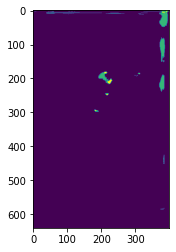

In [152]:
plt.imshow(pred_img[0])

In [129]:
pred_img = predict.cpu().numpy()/3.0

In [130]:
inp = img.squeeze() * 0.5 + 0.5

In [131]:
img_orig = np.clip(inp,0,1)
img_orig = np.array(img_orig)

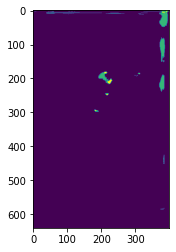

In [139]:
plt.imshow(pred_img[0])